# Paths with constant distance

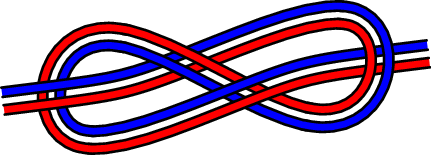

In [1]:
from pyx import *
unit.set(uscale=3, wscale=3)

dist = 0.15           # distance between the ropes
thick = 0.08          # thickness of the ropes

# build the basepath of the knot. This is the curve that lies
# between both ropes.
A = 1.0, 0.1    # point where the knot starts after the straight line
B = 1.3, 0      # point where the knot is curved, overlying the straight line
t = -0.8, -0.1  # direction at A
s =  0.3, 1.2   # direction at B
pts = [
( A[0]-t[0], A[1]-t[1]), ( A[0]     , A[1]     ),
  ( A[0]+t[0], A[1]+t[1]), (-B[0]-s[0],-B[1]-s[1]),
  (-B[0]     ,-B[1]     ), (-B[0]+s[0],-B[1]+s[1]),
  ( B[0]-s[0], B[1]-s[1]), ( B[0]     , B[1]     ),
  ( B[0]+s[0], B[1]+s[1]), (-A[0]-t[0],-A[1]-t[1]),
  (-A[0]     ,-A[1]     ), (-A[0]+t[0],-A[1]+t[1]) ]
seam = path.path(
  path.moveto(*(pts[0])),
  path.lineto(*(pts[1])),
  path.curveto(pts[2][0],pts[2][1],pts[3][0],pts[3][1],pts[4][0],pts[4][1]),
  path.curveto(pts[5][0],pts[5][1],pts[6][0],pts[6][1],pts[7][0],pts[7][1]),
  path.curveto(pts[8][0],pts[8][1],pts[9][0],pts[9][1],pts[10][0],pts[10][1]),
  path.lineto(*(pts[11])) )
# We smooth this curve a little because we used curveto together with lineto
seam = deformer.smoothed(0.6).deform(seam)

# The ropes, when drawn later, will have to overlap in a very specific way.
l = seam.arclen()
epsilon = 0.002*l # small overlap between the segments
seam_segs = seam.split([0.28*l+epsilon, 0.28*l-epsilon,
                        0.42*l+epsilon, 0.42*l-epsilon,
                        0.58*l+epsilon, 0.58*l-epsilon,
                        0.72*l+epsilon, 0.72*l-epsilon])[::2]

# For each segment, two shifted paths build the boundaries of each rope
ropes_segs = []
for seam_seg in seam_segs:
    ropes_segs.append([])
    for ropeshift in [-0.5*dist, 0.5*dist]:
        ropes_segs[-1].append([])
        for edgeshift in [-0.5*thick, 0.5*thick]:
            ropes_segs[-1][-1].append(
              deformer.parallel(ropeshift + edgeshift).deform(seam_seg))
# Now, ropes_segs is a list of segments, containing a list of ropes,
# each containing the two bounding paths of the rope segment

rope_colors = [color.rgb.blue, color.rgb.red]
c = canvas.canvas()
# Because the segments should overlap in a very specific manner
# we have to draw them in the correct order
for index in [1, 4, 2, 0, 3]:
    for rope_seg, col in zip(ropes_segs[index], rope_colors):
        seg = rope_seg[0].joined(rope_seg[1].reversed())
        seg.append(path.closepath())
        c.fill(seg, [col])
        c.stroke(rope_seg[0], [style.linecap.round, style.linejoin.round])
        c.stroke(rope_seg[1], [style.linecap.round, style.linejoin.round])

c

The example shows how to create paths with constant distance. This is achieved
with the aid of `deformer.parallel`, which has already been used in the above
example. 

The first part of the example code is only for creating the middle line of the
knot. In order to obtain a nicely curved rope, we smooth the such defined curve
a bit.

The individual parts of the knot must be stroked in a very specific way in
order to achieve the correct overlapping of the knot. To this end, we split the
base curve into five pieces.

The key element of the example is the use of `deformer.parallel` which creates
the curves with constant distance from the base curve. We apply the deformer
four times, thus creating the outline path of two individual ropes, which
parallel follow the shape of the knot.
